Create a function to flip a coin. It is up to you to determine what this returns to signify heads or tails.

Then create a function to run a simulation of flipping a coin n number of times, default ```2**16```, recording how many heads and tails it has at different intervals. The intervals are exponential, so record at ```2 ** 0, 2 ** 1, 2 ** 2```, and so on until you reach n. Record the final number as well.

In [1]:
import random
import matplotlib.pyplot as plt
#import seaborn
%matplotlib inline

In [2]:
def heads_tails(power_of_two=16):
    """Returns a dictionary of (#heads, #tails) for 2**power_of_two flips"""
    flips = [random.randint(1,2) for _ in range(2**(power_of_two))]
    samples = {}
    for n in range(power_of_two+1):
        sample = flips[:2**n]
        samples[n] = (sample.count(1), sample.count(2))
    return samples

In [3]:
flips = (heads_tails(power_of_two=16))
flips

{0: (0, 1),
 1: (0, 2),
 2: (2, 2),
 3: (5, 3),
 4: (10, 6),
 5: (17, 15),
 6: (32, 32),
 7: (65, 63),
 8: (121, 135),
 9: (251, 261),
 10: (525, 499),
 11: (1021, 1027),
 12: (2066, 2030),
 13: (4159, 4033),
 14: (8257, 8127),
 15: (16486, 16282),
 16: (33016, 32520)}

Then make a line plot of the difference between heads and tails at each recorded point, and another with the ratio of heads to tails at each recorded point.

In [27]:
def make_xys(power_of_two=16):
    """Returns (x1, y1, y2) where x1 is list of number of flips, y1 is difference in heads and tails, y2 is ratio"""
    flips = (heads_tails(power_of_two=power_of_two))
    x1 = sorted([num_flips for num_flips in flips])
    y1 = []
    y2 = []
    for num_flips in x1:
        heads, tails = flips[num_flips]
        y1.append(heads - tails)
        ratio = heads/tails if tails != 0 else heads
        y2.append(ratio)
    #     print(num_flips, heads, tails, heads - tails)
    return x1, y1, y2

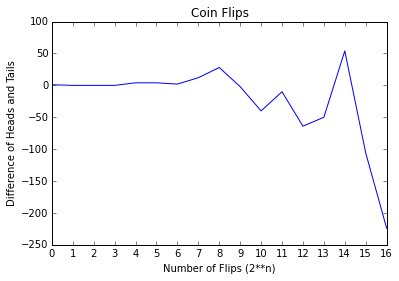

In [28]:
x1, y1, y2 = make_xys(power_of_two=16)
plt.plot(y1)
plt.xticks(range(len(x1)), x1)
plt.xlabel("Number of Flips (2**n)")
plt.ylabel("Difference of Heads and Tails")
plt.title("Coin Flips")
plt.show()

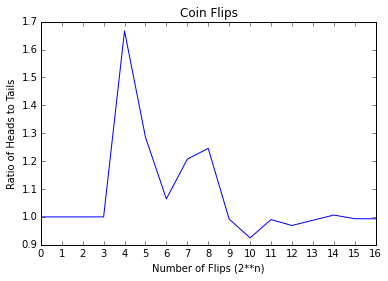

In [29]:
plt.plot(y2)
plt.xticks(range(len(x1)), x1)
plt.xlabel("Number of Flips (2**n)")
plt.ylabel("Ratio of Heads to Tails")
plt.title("Coin Flips")
plt.show()

Create these plots again, but as scatter plots with a logarithmic scale for the x-axis.


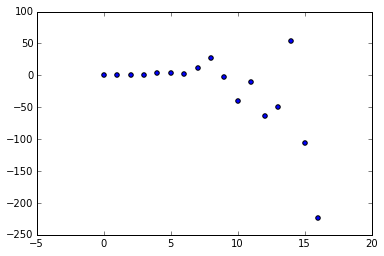

In [30]:
plt.scatter(x1,y1)
plt.show()

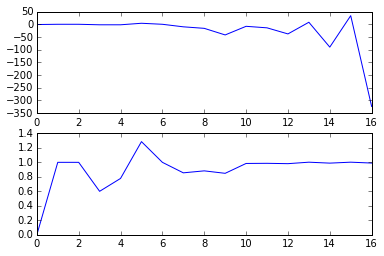

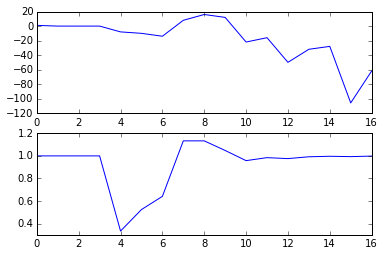

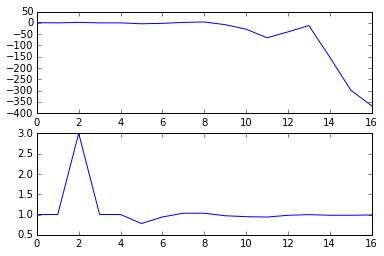

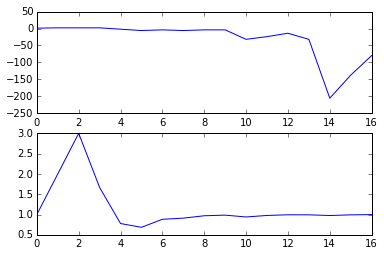

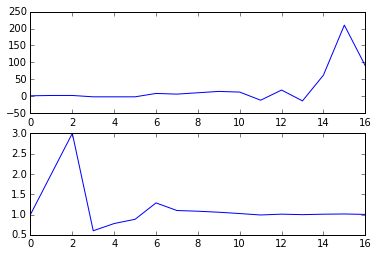

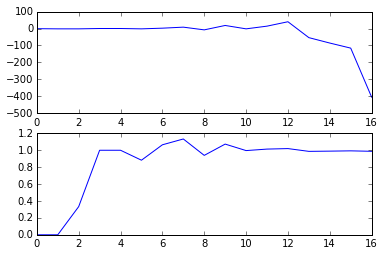

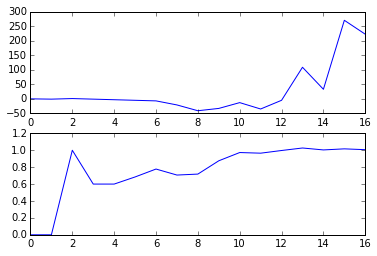

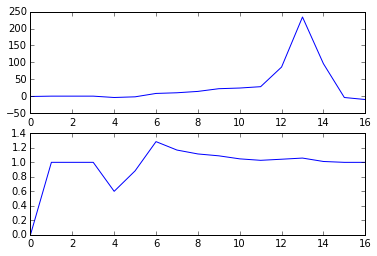

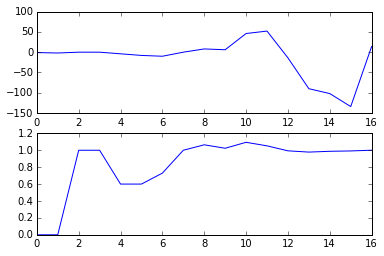

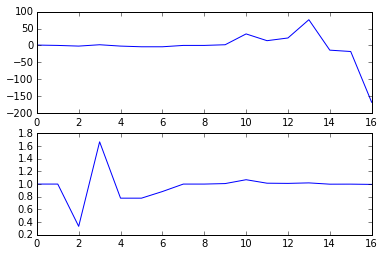

In [33]:
for _ in range(10):
    x1, y1, y2 = make_xys(power_of_two=16)
    fig = plt.figure()

    ax1 = fig.add_subplot(211)
    ax1.plot(y1)
    #ax1.xticks(range(len(x1)), x1)
    #ax1.xlabel("Number of Flips (2**n)")
    #ax1.ylabel("Difference of Heads and Tails")
    #ax1.title("Coin Flips")
    # ax1.show()

    ax2 = fig.add_subplot(212)
    ax2.plot(y2)
    #ax2.xlabel("Number of Flips (2**n)")
    #ax2.ylabel("Ratio of Heads to Tails")
    #ax2.title("Coin Flips")

    plt.show()

In [37]:
# fig, axes = plot.subplots(nrows=2, ncols=3, sharex=True, sharey=True)


Write notes about what you observe. Feel free to add more plots to help you.

##Observations:
Looking at the 10 repetitions of the experiment, the ratio settles toward 1 pretty consistently by ```2**10``` rolls.
The difference between heads and tails, however, diverges further as the number of rolls goes up.  My guess is that it is centered around zero, but the possible local variations increase as the number of rolls increases.

Now we will look at the mean and standard deviation of these trials of flipping coins. Flip coins as before, but run 20 trials of ```2**16``` each.

Use a scatter plot to plot the mean heads/tails ratio at each recorded point, and another scatter plot to plot the standard deviation of the heads/tails ratio at each recorded point. You will want to use a logarithmic scale for the x-axis in both. You may want to do the same for the y-axis with the standard deviation.

In [36]:
trials = [make_xys(power_of_two=16) for _ in range(20)]
### trials is a list of 3-tuples of x1, y1, y2, which
#trials